https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8639374a-964b-4ae9-b33b-b1210052c07d

Slide 21

1. Import data set as a dataframe
2. Load libraries
3. Remove null and nan
4. Remove unusual characters
5. Measure vocab size
6. Explore N-Gram
7. Determine word embedding and explore embedded words based on target inputs
8. Set max sequence length based on length of longest sentence in dataset
9. Tokenize sentences into a list of tokens and remove stopwords
10. Pad cleaned sentences to fit the maximum sequence length after each text sequence
11. Create an activation function filled with dense layers of the neural network
12. Split the data into testing and training sets or into testing/training/validation sets

Slide 37
1. Import the dataset
2. Check on any unusual or abnormal characters
3. Explore the data
4. Clean the data
5. Create a two dimensional numpy array with our ratings by encoding (vectorize)
6. Split into testing and training datasets
7. On the training set apply the tokenizer using the fit_on_texts() method
8. Retrieve the word_index of the training set
9. Pre-padding/Post-padding the sequence to get the maximum length needed
10. Fit the final model, convert both the training set and testing set into arrays using numpy

In [29]:
# Install and import libraries
import pandas as pd
import numpy
import csv
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf 
import keras # Neural Network API
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer #Convert input text to tokens
from tensorflow.keras.callbacks import EarlyStopping #Stop training at a threshold
from tensorflow.keras.models import load_model #To load a saved model
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
import nltk

In [2]:
#Import files
yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None, quoting=csv.QUOTE_NONE)
imdb = pd.read_csv("imdb_labelled.txt", sep="\t", header=None, quoting=csv.QUOTE_NONE)
amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, quoting=csv.QUOTE_NONE)

#Concatenate files and set column names
df = pd.concat([yelp, imdb, amazon], ignore_index = True)
df.columns = ['Review', 'Sentiment']

In [3]:
df.shape

(3000, 2)

In [4]:
df.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
#Detect missing values
df.isnull().values.any()

False

In [6]:
df.isna().sum()

Review       0
Sentiment    0
dtype: int64

In [7]:
#Detect unusual characters 
reviews = df['Review']
char_list = []
for review in reviews:
    for char in review:
        if char not in char_list:
            char_list.append(char)
print(char_list)

['W', 'o', 'w', '.', ' ', 'L', 'v', 'e', 'd', 't', 'h', 'i', 's', 'p', 'l', 'a', 'c', 'C', 'r', 'u', 'n', 'g', 'N', 'y', 'x', 'j', 'S', 'b', 'M', 'k', 'f', 'R', 'm', 'T', 'I', 'H', "'", 'A', ')', ',', '!', 'V', 'B', 'z', '-', '4', 'O', '2', '3', 'q', 'P', 'F', 'G', '5', '1', '0', 'E', 'Z', 'D', 'U', 'J', 'Y', 'K', '&', 'é', ':', ';', '9', '7', '(', 'X', '"', '/', '8', 'Q', '$', '%', '+', '*', '?', '6', 'ê', '\x96', '\x85', 'å', '\x97', '#', '[', ']']


In [8]:
#Drop null values
df.dropna(inplace = True)

<Axes: xlabel='Sentiment', ylabel='count'>

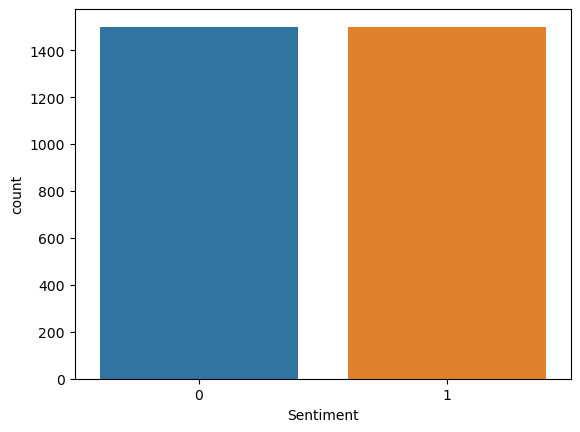

In [9]:
#Compare positive and negative sentiments in dataset
sns.countplot(x='Sentiment', data=df)

In [10]:
# Unusual characters, tokenization, and lemmatization
description_list = []
stop_words = stopwords.words('english')
for description in df['Review']:

    #Regular expression, removes punctuation and special characters
    description = re.sub("[^a-zA-Z]", " ", description)

    #Convert to lower case
    description = description.lower()

    #Perform tokenization
    description = nltk.word_tokenize(description)

    #Perform lemmatization
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]

    #Removing stopwords
    description = [word for word in description if not word in stop_words]
    description = " ".join(description)
    description_list.append(description)

In [11]:
#Initial list of characters in reviews
reviews = description_list
char_list = []
for review in reviews:
    for char in review:
        if char not in char_list:
            char_list.append(char)
print(char_list)

['w', 'o', ' ', 'l', 'v', 'e', 'd', 'p', 'a', 'c', 'r', 'u', 's', 't', 'g', 'y', 'x', 'n', 'm', 'b', 'k', 'h', 'i', 'f', 'z', 'q', 'j']


### Vocab Size: based on preprocessed data

In [12]:
#Identify vocabulary size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(description_list)
vocab_size = len(tokenizer.word_index)+1
print("Vocabulary Size: " + str(vocab_size))

Vocabulary Size: 4553


### Length of review: based on preprocessed data 10:35.  From Slide 28 of Cohort PowerPoint.

### MAX LENGTH IS THE MOST IMPORTANT

In [13]:
#Determine min, med, and max length of reviews
review_length = []
for char_len in description_list:
    review_length.append(len(char_len.split(" ")))

review_max = np.max(review_length)
review_min = np.min(review_length)
review_median = np.median(review_length)
print(review_max)
print(review_median)
print(review_min) 

44
5.0
1


### Embedding Length: NOT IN PPT

In [14]:
max_sequence_embedding = int(round(numpy.sqrt(numpy.sqrt(vocab_size)), 0))
max_sequence_embedding

8

### Train Test Split

In [15]:
#Train test split
X = np.array(description_list)
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15, stratify = y)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

#View training and test sample sizes
print("Training size: ", X_train.shape)
print("Testing size: ", X_test.shape)

Training size:  (2400,)
Testing size:  (600,)


### Padding 13:30

In [16]:
#Apply padding to training data
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequences_train, maxlen = review_max, padding = "post", truncating = "post")

#Apply padding to testing data
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequences_test, maxlen = review_max, padding = "post", truncating = "post")

### Display the padded sequence 13:37

In [17]:
np.set_printoptions(threshold=sys.maxsize)
padded_train[1]

array([ 61,  60, 793, 191,  18,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0])

### Export Data File 14:21

In [18]:
#Convert padded data to numpy array to be used in model
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)

In [19]:
#Export the data to csv files
#pd.DataFrame(training_padded).to_csv("training_padded.csv")
#pd.DataFrame(training_label).to_csv("training_label.csv")
#pd.DataFrame(test_padded).to_csv("test_padded.csv")
#pd.DataFrame(test_label).to_csv("test_label.csv")

### KEY NOTES:
Embedding length is used when performing embedding.  Understand where it is used when creating the embedding layer.
Sequence length is used when performing padding.

### Building NN and NLP in Python

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1b9aff54-735f-456a-a6b4-b11b00eb8d2f

### Building the Neural Network 24:11

In [20]:
What type of neural network is this?

activation = 'softmax'
loss = 'sparse_categorical_crossentropy'
optimizer = 'adam' #rmsprop
num_epochs = 20

#Define early stopping monitor
early_stopping_monitor = EarlyStopping(patience = 2)

model = tf.keras.Sequential([
#tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length),     #Original line without parameters set correctly
tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=max_sequence_embedding, input_length=review_max),
tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(50, activation='relu'),
tf.keras.layers.Dense(2, activation = activation)
])

model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])
#model.summary()     #It was here originally
history = model.fit(training_padded, training_label, batch_size = 32, epochs = num_epochs,
                    validation_split = 0.3, callbacks = [early_stopping_monitor], verbose = True)
model.summary()

Epoch 1/20


C:\Users\darian.gurrola\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4957 - loss: 0.6937 - val_accuracy: 0.5069 - val_loss: 0.6930
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5033 - loss: 0.6930 - val_accuracy: 0.4931 - val_loss: 0.6929
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5073 - loss: 0.6921 - val_accuracy: 0.4944 - val_loss: 0.6929
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 0.6900 - val_accuracy: 0.7806 - val_loss: 0.6810
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - loss: 0.6560 - val_accuracy: 0.7944 - val_loss: 0.5977
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.5461 - val_accuracy: 0.6833 - val_loss: 0.5720
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4484 - val_accuracy: 0.7139 - val_loss: 0.5398
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9153 - loss: 0.3054 - val_accuracy: 0.7403 - val_loss: 0.5240
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 44, 8)          │        36,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 8)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,430 (497.78 KB)

 Trainable params: 42,476 (165.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,954 (331.86 KB)

### Perform Prediction 33:39

In [21]:
#Saving and reloading the model to perform predictions
#SAVE THE MODEL
model.save('my_model.keras')

#Load the model for performing future predictions
my_model = load_model('my_model.keras')

In [22]:
#Perform predictions
predictions = my_model.predict(training_padded)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


In [23]:
#Perform predictions on the test data
predictions = my_model.predict(test_padded)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### THERE'S AN ISSUE BECAUSE THERE IS NO INDEX 9 FOR y_test

In [24]:
#Verify the predicted sentiment by comparing to the actual label from test data
i = 9 #Take any test data to verify

print("Predicted review text: ", X_test[i], "\n")
print("Predicted: ", "Negative" if predictions[i][0] >= 0.5 else "Positive", "review")
print("Actual: ", "Negative" if test_label[i] == 0 else "Positive", "review")

Predicted review text:  fantastic earphone 

Predicted:  Positive review
Actual:  Positive review


### Model Evaluation

In [25]:
# Verify model accuracy on training data
score = model.evaluate(training_padded, training_label, verbose = 0)
print(f'Training Loss: {score[0]} / Training Accuracy: {score[1]}')

Training Loss: 0.22887636721134186 / Training Accuracy: 0.9125000238418579


In [26]:
# Verify model accuracy on test data (data not seen by the model earlier
score = model.evaluate(test_padded, test_label, verbose = 0)
print(f'Test Loss: {score[0]} / Test Accuracy: {score[0]}')

Test Loss: 0.47961297631263733 / Test Accuracy: 0.47961297631263733


In [27]:
#Verify the predicted sentiment by comparing to actual label from test data 
i = 9 #Take any test data to verify

print("Predicted review text: ", X_test[i], "\n")
print("Predicted: ", "Negative" if predictions[i][0] >= 0.5 else "Positive", "review")
print("Actual: ", "Negative" if test_label[i] == 0 else "Positive", "review")

Predicted review text:  fantastic earphone 

Predicted:  Positive review
Actual:  Positive review


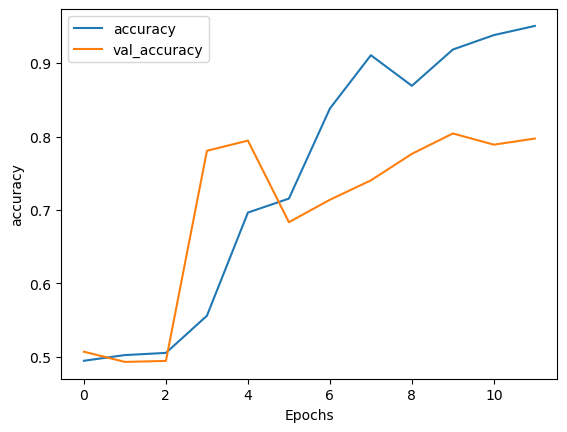

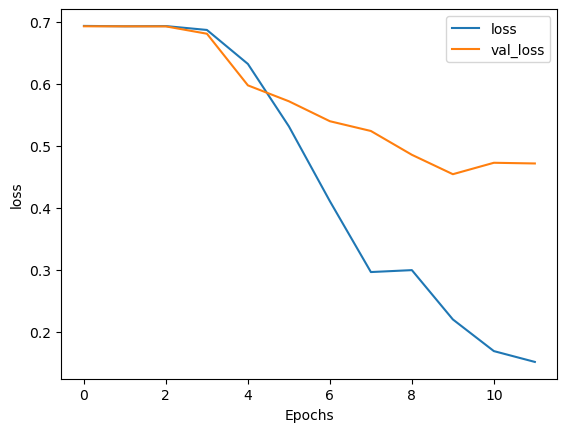

In [30]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")